# Trade of goods , US$, HS 1992, 01 Live animals

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Trade of goods , US$, HS 1992, 01 Live animals.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,"Horses, live pure-bred breeding",Import,15561458.59,NaN,Number of items,28859.00
1,Afghanistan,2018,"Sheep, live",Export,3064.44,1.125916e+03,Number of items,14.98
2,Afghanistan,2018,"Fowls, live domestic > 185 grams",Import,16338543.11,2.190237e+07,Number of items,12297334.30
3,Afghanistan,2018,"Animals, live, except farm animals",Import,13186.60,NaN,No Quantity,0.00
4,Afghanistan,2016,"Sheep, live",Export,6088.00,2.339000e+03,Number of items,51.00
...,...,...,...,...,...,...,...,...
62306,Zimbabwe,1995,"Fowls, live domestic > 185 grams",Export,444.00,0.000000e+00,Number of items,1920.00
62307,Zimbabwe,1995,"Poultry, live except domestic fowls, > 185 grams",Import,25541.00,0.000000e+00,Number of items,1690.00
62308,Zimbabwe,1995,"Poultry, live except domestic fowls, > 185 grams",Export,3482722.00,0.000000e+00,Number of items,1005516.00
62309,Zimbabwe,1995,"Animals, live, except farm animals",Import,111642.00,0.000000e+00,Number of items,2381.00


In [5]:
df.shape                      

(62311, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62311 entries, 0 to 62310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  62311 non-null  object 
 1   Year             62311 non-null  int64  
 2   Commodity        62311 non-null  object 
 3   Flow             62311 non-null  object 
 4   Trade (USD)      62311 non-null  float64
 5   Weight (kg)      58567 non-null  float64
 6   Quantity Name    62311 non-null  object 
 7   Quantity         53164 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
df.rename(columns={'Country or Area': 'Country_or_Area'}, inplace=True)

df.head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,"Horses, live pure-bred breeding",Import,15561458.59,NaN,Number of items,28859.00
1,Afghanistan,2018,"Sheep, live",Export,3064.44,1.125916e+03,Number of items,14.98
2,Afghanistan,2018,"Fowls, live domestic > 185 grams",Import,16338543.11,2.190237e+07,Number of items,12297334.30
3,Afghanistan,2018,"Animals, live, except farm animals",Import,13186.60,NaN,No Quantity,0.00
4,Afghanistan,2016,"Sheep, live",Export,6088.00,2.339000e+03,Number of items,51.00


In [8]:
df1 = df[['Country_or_Area', 'Year', 'Commodity', 'Flow', 'Trade (USD)',
       'Weight (kg)', 'Quantity']]

df1.head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity
0,Afghanistan,2018,"Horses, live pure-bred breeding",Import,15561458.59,NaN,28859.00
1,Afghanistan,2018,"Sheep, live",Export,3064.44,1.125916e+03,14.98
2,Afghanistan,2018,"Fowls, live domestic > 185 grams",Import,16338543.11,2.190237e+07,12297334.30
3,Afghanistan,2018,"Animals, live, except farm animals",Import,13186.60,NaN,0.00
4,Afghanistan,2016,"Sheep, live",Export,6088.00,2.339000e+03,51.00


In [9]:
df1.describe(exclude='number')                 

,Country_or_Area,Commodity,Flow
count,62311,62311,62311
unique,207,15,4
top,Canada,"Animals, live, except farm animals",Import
freq,1046,7662,34773


In [10]:
df1[['Trade (USD)', 'Weight (kg)', 'Quantity']].describe()            # weight and quantity columns contain missing data

,Trade (USD),Weight (kg),Quantity
count,6.231100e+04,5.856700e+04,5.316400e+04
mean,1.324196e+07,1.183290e+07,2.736069e+08
std,7.302369e+07,7.428858e+08,1.900431e+10
min,9.300000e-01,0.000000e+00,0.000000e+00
25%,1.800000e+04,1.103500e+03,1.000000e+02
50%,2.317880e+05,2.137622e+04,3.761000e+03
75%,2.690106e+06,3.303830e+05,1.142995e+05
max,2.532308e+09,1.201042e+11,2.833182e+12


# Missing Values Exploration

In [11]:
df1.isna().any()

Country_or_Area    False
Year               False
Commodity          False
Flow               False
Trade (USD)        False
Weight (kg)         True
Quantity            True
dtype: bool

In [12]:
df1.isna().sum()                                                      

Country_or_Area       0
Year                  0
Commodity             0
Flow                  0
Trade (USD)           0
Weight (kg)        3744
Quantity           9147
dtype: int64

In [13]:
df1['Weight (kg)'].isna().value_counts()                                  

False    58567
True      3744
Name: Weight (kg), dtype: int64

In [14]:
df1['Weight (kg)'].isna().value_counts(True)                            

False    0.939914
True     0.060086
Name: Weight (kg), dtype: float64

In [15]:
wt_idx = df1.index[df1['Weight (kg)'].isna()]                      # filter weight index containing missing values               

df1.loc[wt_idx].head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity
0,Afghanistan,2018,"Horses, live pure-bred breeding",Import,15561458.59,NaN,28859.0
3,Afghanistan,2018,"Animals, live, except farm animals",Import,13186.60,NaN,0.0
126,Albania,2007,"Horses, live pure-bred breeding",Import,97402.00,NaN,NaN
127,Albania,2007,"Horses, live except pure-bred breeding",Import,8753.00,NaN,NaN
131,Albania,2007,"Swine, live except pure-bred breeding < 50 kg",Import,103493.00,NaN,NaN


In [16]:
df1['Quantity'].isna().value_counts()

False    53164
True      9147
Name: Quantity, dtype: int64

In [17]:
qty_idx = df1.index[df1['Quantity'].isna()]                                   # filter quantity index containing missing values  

df1.loc[qty_idx].head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity
43,Albania,2014,"Animals, live, except farm animals",Import,17544.0,4948.0,NaN
56,Albania,2013,"Animals, live, except farm animals",Import,816312.0,108525.0,NaN
57,Albania,2013,"Animals, live, except farm animals",Export,846588.0,99329.0,NaN
70,Albania,2012,"Animals, live, except farm animals",Import,1401366.0,208478.0,NaN
71,Albania,2012,"Animals, live, except farm animals",Export,895347.0,119590.0,NaN


In [18]:
df2 = df1.fillna(0)                          # fill missing values with 0        
df2.head()     

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity
0,Afghanistan,2018,"Horses, live pure-bred breeding",Import,15561458.59,0.000000e+00,28859.00
1,Afghanistan,2018,"Sheep, live",Export,3064.44,1.125916e+03,14.98
2,Afghanistan,2018,"Fowls, live domestic > 185 grams",Import,16338543.11,2.190237e+07,12297334.30
3,Afghanistan,2018,"Animals, live, except farm animals",Import,13186.60,0.000000e+00,0.00
4,Afghanistan,2016,"Sheep, live",Export,6088.00,2.339000e+03,51.00


In [19]:
df2.isna().sum()                               # no missing values

Country_or_Area    0
Year               0
Commodity          0
Flow               0
Trade (USD)        0
Weight (kg)        0
Quantity           0
dtype: int64

# Grouping and Aggregation

In [20]:
country_area_grouped = df2.groupby('Country_or_Area')
country_area_grouped.head()

,Country_or_Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity
0,Afghanistan,2018,"Horses, live pure-bred breeding",Import,15561458.59,0.000000e+00,2.885900e+04
1,Afghanistan,2018,"Sheep, live",Export,3064.44,1.125916e+03,1.498000e+01
2,Afghanistan,2018,"Fowls, live domestic > 185 grams",Import,16338543.11,2.190237e+07,1.229733e+07
3,Afghanistan,2018,"Animals, live, except farm animals",Import,13186.60,0.000000e+00,0.000000e+00
4,Afghanistan,2016,"Sheep, live",Export,6088.00,2.339000e+03,5.100000e+01
...,...,...,...,...,...,...,...
62009,Zimbabwe,2018,"Horses, live pure-bred breeding",Import,131.54,0.000000e+00,0.000000e+00
62010,Zimbabwe,2018,"Horses, live except pure-bred breeding",Import,77024.30,8.830000e+04,0.000000e+00
62011,Zimbabwe,2018,"Horses, live except pure-bred breeding",Export,21552.88,2.625000e+04,0.000000e+00
62012,Zimbabwe,2018,"Bovine animals, live pure-bred breeding",Import,1512108.15,4.886140e+05,8.525287e+02


# Trade (USD) Exploration

In [21]:
agg_trade_stats = country_area_grouped.agg(
    min_trade = ('Trade (USD)', np.min),
    mean_trade = ('Trade (USD)', np.mean),
    max_trade = ('Trade (USD)', np.max),
    total_trade = ('Trade (USD)', np.sum)  
)

agg_trade_stats

,min_trade,mean_trade,max_trade,total_trade
Country_or_Area,,,,
Afghanistan,3064.44,4.707586e+06,1.633854e+07,3.295310e+07
Albania,108.00,1.587993e+06,2.913083e+07,4.287580e+08
Algeria,106.00,7.787771e+06,1.555273e+08,1.643220e+09
Andorra,66.00,5.094537e+04,1.631429e+06,1.793277e+07
Angola,6.72,6.480001e+05,1.203264e+07,1.004400e+08
...,...,...,...,...
Viet Nam,102.00,9.796111e+06,4.404256e+08,2.027795e+09
Wallis and Futuna Isds,734.00,1.709475e+04,9.295900e+04,3.418950e+05
Yemen,52.00,5.276941e+06,4.376760e+07,6.701715e+08


In [22]:
agg_trade_stats['total_trade'].sort_values(ascending=False).head(10)                 # top ten country or area with the highest trade in dollars

Country_or_Area
USA               8.421445e+10
Germany           6.107290e+10
Netherlands       6.067681e+10
France            5.981359e+10
Canada            4.850034e+10
EU-28             4.424092e+10
Italy             4.263916e+10
United Kingdom    3.205784e+10
Spain             2.447586e+10
Australia         2.430672e+10
Name: total_trade, dtype: float64

[Text(0.5, 0, 'Trade ($)'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Trade of Goods (Live Animals)')]

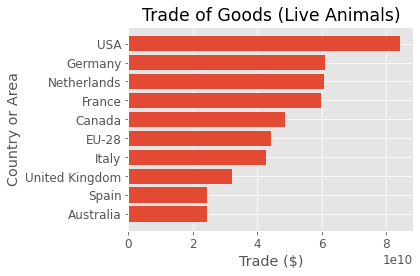

In [23]:
top_10_trade = agg_trade_stats['total_trade'].sort_values(ascending=False).head(10)

fig, ax = plt.subplots()

hbars = ax.barh(top_10_trade.keys(), top_10_trade.values, align='center')
ax.invert_yaxis()                                                                                # labels read top-to-bottom
ax.set(xlabel='Trade ($)', ylabel='Country or Area', title='Trade of Goods (Live Animals)')

In [24]:
agg_trade_stats['total_trade'].sort_values(ascending=True).head(10)            # top ten country or area with the lowest trade in dollars

Country_or_Area
Kiribati                  3525.00
Djibouti                  3997.00
Haiti                     7620.00
Chad                     20040.00
Timor-Leste              25964.89
Guinea-Bissau            27962.00
Turks and Caicos Isds    30450.00
Cook Isds                35759.00
Anguilla                 40585.00
FS Micronesia            96966.00
Name: total_trade, dtype: float64

[Text(0.5, 0, 'Trade ($)'),
 Text(0, 0.5, 'Country or Area'),
 Text(0.5, 1.0, 'Trade of Goods (Live Animals)')]

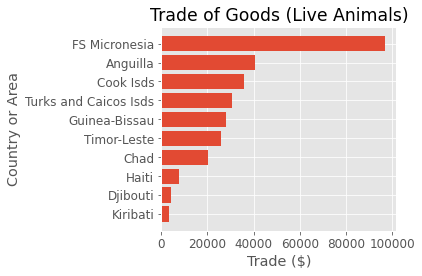

In [25]:
low_10_trade = agg_trade_stats['total_trade'].sort_values(ascending=True).head(10)

fig, ax = plt.subplots()

hbars = ax.barh(low_10_trade.keys(), low_10_trade.values, align='center')
ax.set(xlabel='Trade ($)', ylabel='Country or Area', title='Trade of Goods (Live Animals)')

# USA Exploration

In [26]:
df_USA = country_area_grouped[['Year', 'Flow', 'Trade (USD)']].get_group('USA')
df_USA

,Year,Flow,Trade (USD)
59872,2018,Import,104951644.0
59873,2018,Export,305211451.0
59874,2018,Re-Export,92571507.0
59875,2018,Import,492488413.0
59876,2018,Export,212368098.0
...,...,...,...
60899,1991,Export,2063932.0
60900,1991,Import,124425.0
60901,1991,Import,47134738.0
60902,1991,Export,31305115.0


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Trade (USD)')]

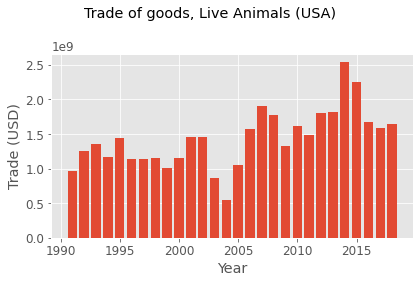

In [27]:
x = df_USA['Year']
y = df_USA['Trade (USD)']
z = df_USA['Flow']

fig, ax = plt.subplots()
fig.suptitle('Trade of goods, Live Animals (USA)')

ax.bar(x, y)
ax.set(xlabel='Year', ylabel='Trade (USD)')

[Text(0.5, 0, 'Flow'), Text(0, 0.5, 'Trade (USD)')]

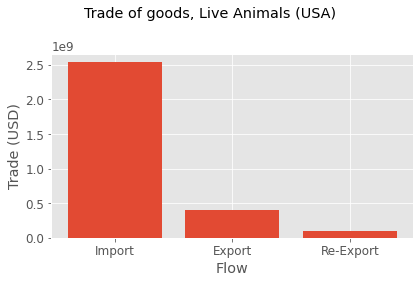

In [28]:
fig, ax = plt.subplots()
fig.suptitle('Trade of goods, Live Animals (USA)')

ax.bar(z, y)
ax.set(xlabel='Flow', ylabel='Trade (USD)')